In [1]:
# -*- coding: utf-8 -*-
#import esda
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
#import contextily as ctx
from pylab import figure, scatter, show
import warnings
# warnings.filterwarnings('ignore')
# %matplotlib inline
from math import cos,pi

#import geoplot as gplt
#import geoplot.crs as gcrs
from matplotlib.patches import Patch
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from splot.esda import plot_moran,plot_moran_bv_simulation
import scipy.stats as ss   
from esda.moran import Moran,Moran_BV
import networkx as nx

In [2]:

year = 2020 

In [3]:
df_map = gpd.read_file('../data/statistical-gis-boundaries-london/ESRI', crs='ESRI:54004')

scattergdf = gpd.read_file(f'../result/data/osm_poi_data_selected/{year}/greater-london-{year}-free-selected.shp')
scattergdf = scattergdf.to_crs(crs='OSGB36 / British National Grid + ODN height') 
scattergdf

,osm_id,code,fclass,name,class,geometry
0,20849687,2303,cafe,None,2.0,POINT (515967.301 169339.234)
1,25475389,2303,cafe,Woburn Cafe,2.0,POINT (529872.043 182516.376)
2,25497832,2303,cafe,Cafe Angel,2.0,POINT (530788.556 182337.753)
3,25696354,2303,cafe,Crazy Horse Cafe,2.0,POINT (533579.505 185455.618)
4,25991205,2303,cafe,Jack's Cafe,2.0,POINT (533738.781 185323.442)
...,...,...,...,...,...,...
13841,6457582585,2504,mall,None,1.0,POINT (534164.339 176712.156)
13842,6498189131,2504,mall,Hadson Mall,1.0,POINT (526776.955 182034.149)
13843,3753647145,2306,food_court,Ethos,2.0,POINT (529217.767 181360.614)
13844,5718576951,2306,food_court,None,2.0,POINT (540913.615 184231.717)


In [4]:
G = nx.read_graphml('../data/london.graph.xml')

n=[]
p=[]

for node in G.nodes():
    a = eval(G.nodes[node]['coords'])
    #G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])
    p.append(Point(a))
    n.append(node)
    #print(p)
#pos = nx.get_node_attributes(G, 'coords')

subway = gpd.GeoDataFrame(n,crs='OSGB36 / British National Grid + ODN height',geometry=p)
#subway = gpd.GeoDataFrame(subway)
#subway.rename(columns={'0':'nodes'},inplace=True)
subway

,0,geometry
0,Wembley Park,POINT (519316.559 186389.330)
1,Kingsbury,POINT (519359.969 188721.220)
2,Queensbury,POINT (518811.361 189760.507)
3,Canons Park,POINT (518183.300 191257.263)
4,Stanmore,POINT (517580.460 192537.999)
...,...,...
396,Heathrow Terminal 5,POINT (504965.941 175923.361)
397,Brixton,POINT (531054.149 175421.931)
398,Vauxhall,POINT (530420.272 177894.386)
399,Pimlico,POINT (529723.571 178312.661)


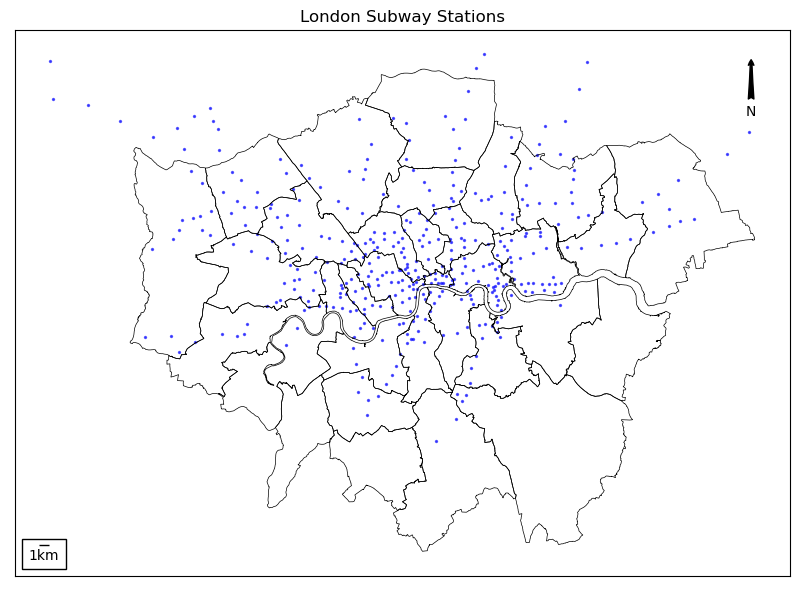

In [23]:
# draw the london map 
fig,ax = plt.subplots(figsize=(10,10))
# draw the london borough
df_map.plot(ax=ax,facecolor='none',edgecolor='k',lw=0.5,zorder=12)

subway.plot(ax=ax,color='b',marker='o',
            markersize=2,alpha=0.6)

# # add the borough name 
# centroids = df_map.geometry.centroid
# for i,p in enumerate(centroids):
#    ax.text(p.x,p.y,s = df_map.loc[i,'NAME'],fontsize=10,color='k',zorder=13,
#            horizontalalignment='center')

#ax.axis('off')
plt.xticks([])
plt.yticks([])
plt.title('London Subway Stations')

#plot North arrow
x,y,arrow_length = 0.95,0.95,0.1
ax.annotate('N',xy=(x,y),xytext=(x,y-arrow_length),
            ha = 'center',va='center',fontsize=10,
            arrowprops=dict(arrowstyle='Fancy',facecolor='black'),
            xycoords=ax.transAxes)

#plot scale bar
size = 1000  # 距离时为1000米
iow_scale_bar = AnchoredSizeBar(ax.transData,
                                size=size,label='1km',loc='lower left',pad=0.5,
                                borderpad=0.5,color='black',
                                frameon=True)#,size_vertical=0.5)
ax.add_artist(iow_scale_bar)

# #plot legend
# legend_elements = [Patch(facecolor=color[i], edgecolor=color[i],
#                       label=labels[i]) for i in range(0,8)]

# ax.legend(handles=legend_elements, loc='lower right',handlelength=0.8,fontsize=10,title='Retail Type')
    
path_out = '../result/plot/'
filename = f'{year}_London_subway'
plt.savefig(path_out+filename+'.png',
                dpi=500,bbox_inches = 'tight')

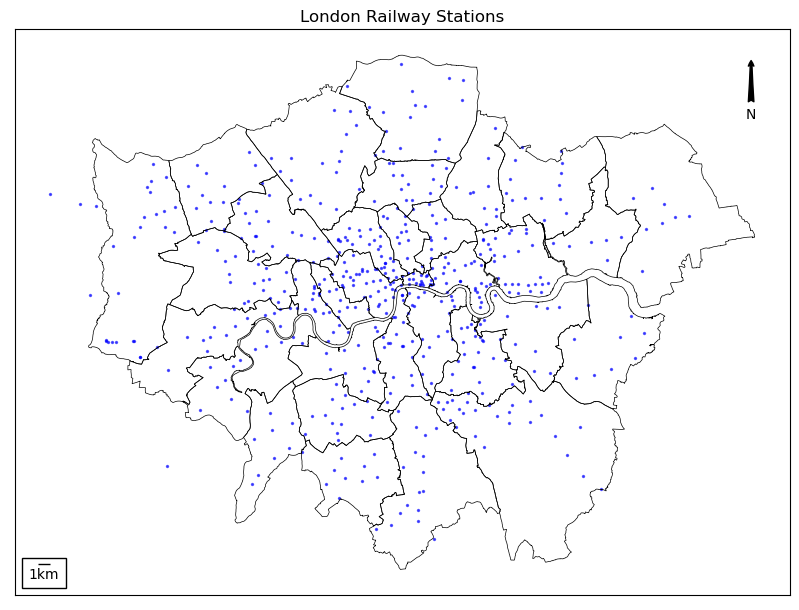

In [24]:
# railway stations
transport = gpd.read_file(f'../data/osm_poi_data/greater-london-200101-free.shp/gis_osm_transport_free_1.shp')
transport = transport.to_crs(crs='OSGB36 / British National Grid + ODN height')
railway = transport[transport['fclass']=='railway_station']
# draw the london map 
fig,ax = plt.subplots(figsize=(10,10))
# draw the london borough
df_map.plot(ax=ax,facecolor='none',edgecolor='k',lw=0.5,zorder=12)

railway.plot(ax=ax,color='b',marker='o',
            markersize=2,alpha=0.6)

# # add the borough name 
# centroids = df_map.geometry.centroid
# for i,p in enumerate(centroids):
#    ax.text(p.x,p.y,s = df_map.loc[i,'NAME'],fontsize=10,color='k',zorder=13,
#            horizontalalignment='center')

#ax.axis('off')
plt.xticks([])
plt.yticks([])
plt.title('London Railway Stations')

#plot North arrow
x,y,arrow_length = 0.95,0.95,0.1
ax.annotate('N',xy=(x,y),xytext=(x,y-arrow_length),
            ha = 'center',va='center',fontsize=10,
            arrowprops=dict(arrowstyle='Fancy',facecolor='black'),
            xycoords=ax.transAxes)

#plot scale bar
size = 1000  # 距离时为1000米
iow_scale_bar = AnchoredSizeBar(ax.transData,
                                size=size,label='1km',loc='lower left',pad=0.5,
                                borderpad=0.5,color='black',
                                frameon=True)#,size_vertical=0.5)
ax.add_artist(iow_scale_bar)

# #plot legend
# legend_elements = [Patch(facecolor=color[i], edgecolor=color[i],
#                       label=labels[i]) for i in range(0,8)]

# ax.legend(handles=legend_elements, loc='lower right',handlelength=0.8,fontsize=10,title='Retail Type')
    
path_out = '../result/plot/'
filename = f'{year}_London_railway'
plt.savefig(path_out+filename+'.png',
                dpi=500,bbox_inches = 'tight')

In [7]:
# 计算地铁点到零售店之间的距离
dis = railway.geometry.apply(lambda g: scattergdf.distance(g))

In [8]:
dis

,0,1,2,3,4,5,6,7,8,9,...,13836,13837,13838,13839,13840,13841,13842,13843,13844,13845
0,7031.177343,26168.757815,26739.021539,30891.495974,30923.649852,32905.760749,22768.108587,17698.316028,20416.051102,51308.629142,...,20846.453199,25459.736593,25128.633724,25847.269843,38627.035009,26451.992046,23612.678905,24911.700304,36033.779936,17977.902878
1,12937.042824,7110.545499,7924.266612,11697.719890,11779.765984,13508.459581,11168.686950,16245.505226,10018.951944,33393.917427,...,2271.720294,6995.725999,7072.962416,7616.018796,19013.600657,11470.004888,4084.917394,6158.647954,18199.993981,5840.258162
2,14561.153612,23847.857000,24742.937470,27951.286069,28082.691048,29330.200016,26623.116592,26917.635498,9647.623493,49847.230374,...,19258.770216,23982.123350,24114.085493,24626.618178,31278.291169,28219.558195,20720.432397,23104.847459,35011.491029,20139.155945
3,23274.626124,9345.864909,9976.010410,9787.076635,9992.301431,9834.148854,18880.847092,26221.232369,12229.308752,29560.846410,...,11156.693543,10651.728282,11364.401613,11128.888790,9488.349953,16533.101574,8756.224608,10097.044400,16892.816005,15938.602313
4,30679.369197,21977.440356,21167.990837,21557.702599,21356.131108,22572.943681,15546.089137,18834.321407,36234.401575,23861.596639,...,24009.554339,20940.820842,20383.347214,20309.442734,31407.155246,15039.783295,24141.941844,21767.604941,16929.465497,22029.069645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20944,28724.661160,9723.175337,9049.811302,5070.682182,4981.948711,3659.120968,15924.464565,25017.281033,23886.105041,16940.141136,...,15110.187858,10298.109816,10641.280134,9917.745965,10495.340757,11530.517205,12681.489430,10897.687544,4242.878572,17986.793760
20945,34265.910908,15210.399657,14814.999494,10678.613491,10709.794930,8534.349670,22841.932845,31913.060426,26495.667969,16151.245732,...,20397.855633,16171.504296,16689.832328,15977.721970,6672.439473,18530.515858,17616.369858,16526.099937,10468.093511,24048.658144
20946,31945.598717,12804.940717,12338.343855,8160.742897,8170.285964,6058.625936,20147.401722,29226.145438,25088.297171,16321.074596,...,18095.608083,13683.231496,14164.610188,13444.636071,7385.829460,15822.327332,15385.909819,14100.632763,8022.234996,21554.576432
20947,23440.571078,5019.487834,4150.095737,2545.069583,2352.540830,4137.382467,10748.324287,19803.768487,20447.960987,21357.593759,...,10153.236554,5170.406254,5368.410921,4670.897707,13401.804459,6566.333618,8151.836274,5927.854575,6154.876543,12594.808258


In [9]:
dis_min = dis.min()
dis_min

0        1481.843536
1         372.751414
2         601.539177
3         447.811424
4         390.687683
            ...     
13841     389.283495
13842     378.657480
13843     185.316210
13844     530.289529
13845     558.467001
Length: 13846, dtype: float64

In [10]:
#给出地铁点周边的零售点密度，以10米为间隔,计算每个圆环内的平均Retail Density
rang = list(range(0,1001,10))

densitys = []
# for i,r in enumerate(rang[1:]):
    
#     count = (dis<=r) & (dis>rang[i])
#     #bb = (count.sum(axis=1)>0).sum()
#     num   = count.sum().sum()
#     #print(f'{r}:{num}')
#     #area  = (pi*r*r-pi*rang[i]*rang[i])*bb
#     area  = pi*r*r-pi*rang[i]*rang[i]
#     densitys.append(num/area)
# #densitys

for i,r in enumerate(rang[1:]):
    
    count = (dis_min<=r) & (dis_min>rang[i])
    num   = count.sum()
    #print(f'{r}:{num}')
    area  = pi*r*r-pi*rang[i]*rang[i]
    densitys.append(num/area)

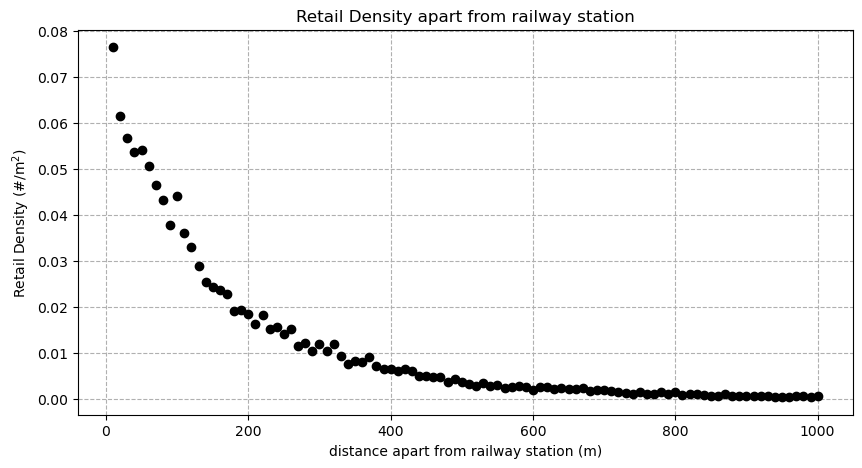

In [25]:
fig, ax = plt.subplots(figsize=(10,5))

xx=rang[1:]

y = densitys
ax.plot(xx, y,'ko',linewidth=3)

ax.grid(linestyle='--')

ax.set_title("Retail Density apart from railway station")
plt.xlabel("distance apart from railway station (m)")
plt.ylabel("Retail Density (#/m${^2}$)")

path_out = '../result/plot/'
filename = 'Retail_Density_apart_from_railway_station'
plt.savefig(path_out+filename+'.png',
            dpi=500,bbox_inches = 'tight')

10:24
20:58
30:89
40:118
50:153
60:175
70:190
80:204
90:202
100:263
110:238
120:238
130:227
140:215
150:222
160:230
170:236
180:210
190:224
200:226
210:209
220:248
230:215
240:231
250:217
260:245
270:192
280:210
290:188
300:224
310:200
320:237
330:192
340:161
350:180
360:178
370:210
380:168
390:161
400:164
410:157
420:173
430:166
440:140
450:139
460:138
470:140
480:110
490:131
500:114
510:102
520:90
530:119
540:94
550:104
560:84
570:97
580:100
590:101
600:77
610:99
620:106
630:88
640:96
650:88
660:93
670:98
680:79
690:83
700:88
710:80
720:67
730:62
740:56
750:71
760:56
770:55
780:79
790:54
800:73
810:51
820:58
830:63
840:50
850:39
860:43
870:60
880:42
890:38
900:45
910:40
920:38
930:35
940:31
950:28
960:32
970:42
980:38
990:27
1000:39


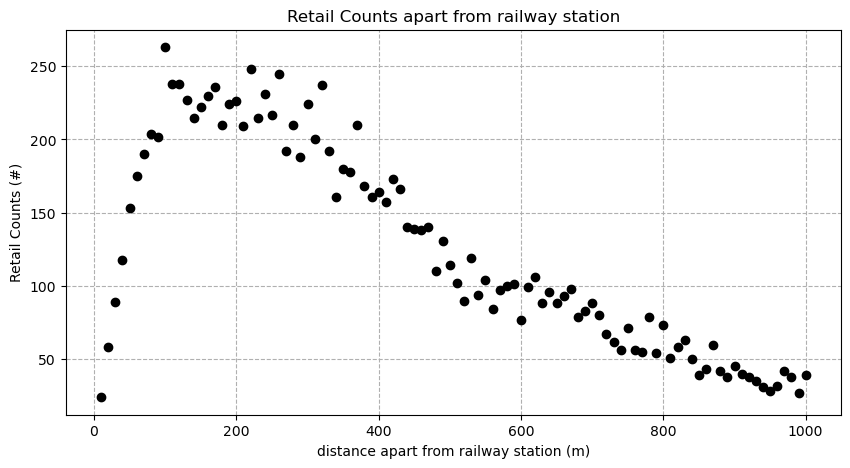

In [26]:
ccc = []
for i,r in enumerate(rang[1:]):
    
    count = (dis_min<=r) & (dis_min>rang[i])
    num   = count.sum()
    print(f'{r}:{num}')
    ccc.append(num)

fig, ax = plt.subplots(figsize=(10,5))

xx=rang[1:]

y = ccc
ax.plot(xx, y,'ko',linewidth=3)

ax.grid(linestyle='--')

ax.set_title("Retail Counts apart from railway station")
plt.xlabel("distance apart from railway station (m)")
plt.ylabel("Retail Counts (#)")

path_out = '../result/plot/'
filename = 'Retail_Counts_apart_from_railway_station'
plt.savefig(path_out+filename+'.png',
            dpi=500,bbox_inches = 'tight')

In [13]:
roads = gpd.read_file(f'../data/osm_poi_data/greater-london-200101-free.shp/gis_osm_roads_free_1.shp')
roads = roads.to_crs(crs='OSGB36 / British National Grid + ODN height')
#['primary','trunk','secondary','tertiary']
roads_f = roads[roads['fclass']=='primary']
roads_1 = roads[roads['fclass']=='trunk']
roads_2 = roads[roads['fclass']=='secondary']
roads_3 = roads[roads['fclass']=='tertiary']
roads_f

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry
0,73,5113,primary,Ballards Lane,A598,F,48,0,F,F,"LINESTRING (526261.019 191961.687, 526263.240 ..."
1,74,5113,primary,Ballards Lane,A598,B,48,0,F,F,"LINESTRING (525234.977 190761.277, 525245.009 ..."
2,75,5113,primary,High Road,A1000,B,48,0,F,F,"LINESTRING (526322.962 192523.880, 526324.174 ..."
3,79,5113,primary,East End Road,A504,B,48,0,F,F,"LINESTRING (524910.933 190241.128, 524925.682 ..."
4,482,5113,primary,Cockfosters Road,A111,B,48,0,F,F,"LINESTRING (527282.400 198577.191, 527284.883 ..."
...,...,...,...,...,...,...,...,...,...,...,...
281565,759488637,5113,primary,Newgate,A212,F,48,0,F,F,"LINESTRING (532421.149 166484.164, 532418.040 ..."
281567,759491006,5113,primary,Heath Road,A305,F,48,0,F,F,"LINESTRING (515886.993 173123.197, 515865.289 ..."
281568,759491007,5113,primary,Heath Road,A305,F,48,0,F,F,"LINESTRING (515886.840 173129.936, 515922.147 ..."
281569,759491008,5113,primary,Heath Road,A305,F,48,0,F,F,"LINESTRING (515778.907 173139.142, 515788.895 ..."


In [14]:
roads_1

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry
9,1200,5112,trunk,Hanger Lane,A406,B,64,0,F,F,"LINESTRING (518636.002 181068.902, 518640.873 ..."
11,1202,5112,trunk,North Circular Road,A406,F,64,0,F,F,"LINESTRING (523236.126 187572.516, 523253.073 ..."
12,1203,5112,trunk,North Circular Road,A406,F,64,0,F,F,"LINESTRING (528951.950 191792.798, 528922.344 ..."
13,1208,5112,trunk,Bowes Road,A406,F,48,0,F,F,"LINESTRING (530434.112 192087.230, 530482.564 ..."
158,2961,5112,trunk,Plassy Road,A205,F,48,0,F,F,"LINESTRING (537883.684 173749.266, 537862.187 ..."
...,...,...,...,...,...,...,...,...,...,...,...
281301,758888959,5112,trunk,Camden Road,A503,B,48,0,F,F,"LINESTRING (529206.377 184210.988, 529217.767 ..."
281396,759080612,5112,trunk,Hanger Lane,A406,B,48,0,F,F,"LINESTRING (518615.109 180716.953, 518612.302 ..."
281397,759080613,5112,trunk,Hanger Lane,A406,B,48,0,F,F,"LINESTRING (518617.877 180641.781, 518617.931 ..."
281555,759462552,5112,trunk,Clifford Avenue,A205,F,48,0,F,F,"LINESTRING (519818.864 175515.915, 519819.426 ..."


In [15]:
# 计算地铁点到零售店之间的距离
dis_f = roads_f.geometry.apply(lambda g: scattergdf.distance(g))
dis_f

,0,1,2,3,4,5,6,7,8,9,...,13836,13837,13838,13839,13840,13841,13842,13843,13844,13845
0,24854.295749,10112.042084,10635.727658,9792.301463,9999.160498,9483.712539,19812.816131,27427.765951,13707.252030,28619.197344,...,12484.022318,11464.384403,12193.988900,11876.857759,7933.212604,17175.873930,9940.935497,11005.685050,16566.562985,17248.582016
1,23340.816970,9459.427841,10089.499729,9888.144510,10093.551616,9917.741235,18992.477356,26324.585850,12223.563564,29609.171298,...,11254.905341,10765.057749,11477.585683,11242.455592,9457.985487,16646.660204,8862.305344,10209.558263,16980.552282,16037.186353
2,25336.712367,10559.673469,11065.010802,10086.063590,10292.465036,9681.797541,20276.816556,27922.968506,14022.522613,28584.217127,...,12987.878173,11916.898134,12648.107899,12318.658874,7580.038174,17593.475699,10437.979451,11472.520440,16750.658032,17751.434033
3,22722.203574,8720.478900,9356.788749,9272.104525,9476.184160,9412.529797,18253.946936,25623.272167,11696.049533,29311.930198,...,10583.066707,10024.235099,10736.438173,10503.554406,9658.599778,15911.910171,8148.540801,9468.814998,16443.965184,15362.171747
4,31145.821591,15981.987668,16323.367140,14256.432778,14444.784293,13066.285253,25746.754820,33715.985448,18578.197076,28481.337785,...,18907.104856,17356.928703,18091.531325,17658.647672,5675.311175,22627.235283,16285.508922,17043.057575,19506.536051,23652.423836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281565,16687.548296,16229.998613,15934.473287,19005.791863,18884.414666,20996.349832,6480.004591,4648.079427,25769.644095,33006.312270,...,14789.270005,14855.038293,14120.550149,14577.239985,30003.664590,10375.478317,16536.902617,15213.210287,19674.797036,10716.269139
281567,3784.814618,16846.762721,17520.405721,21566.492849,21622.495806,23488.392055,15905.617156,14943.120170,11938.441352,42745.911714,...,11454.880273,16333.805334,16128.465621,16814.666017,28833.947865,18626.379196,14071.117042,15670.500582,27381.216844,9804.667986
281568,3784.796396,16731.896497,17403.129403,21452.756547,21508.136734,23377.678916,15773.674891,14840.360239,11936.039591,42621.590449,...,11340.057881,16214.203309,16006.496767,16693.455880,28748.940992,18494.940082,13963.025445,15553.217589,27256.641662,9672.813925
281569,3791.555243,16843.133557,17516.992861,21562.765820,21618.820762,23484.426590,15905.851003,14947.090863,11914.509694,42743.281659,...,11451.253052,16330.623544,16125.545445,16811.658113,28828.577493,18625.232339,14066.969079,15667.089673,27378.623703,9803.718908


In [16]:
dis_1 = roads_1.geometry.apply(lambda g: scattergdf.distance(g))
dis_1

,0,1,2,3,4,5,6,7,8,9,...,13836,13837,13838,13839,13840,13841,13842,13843,13844,13845
9,12029.425464,11299.526157,12191.739705,15528.557224,15646.172660,17071.693143,15466.253168,19025.110274,5658.096740,37432.402391,...,6939.382308,11453.780448,11630.272549,12108.253199,20836.116664,16127.941459,8169.853539,10567.095060,22470.060026,9388.840372
11,19628.764556,8318.256978,9161.628930,10504.886984,10688.357862,11263.906187,16952.709940,23494.658393,9146.456779,31705.436485,...,8349.627809,9379.532915,9994.442929,9990.076417,12988.903528,15391.877698,6572.210528,8610.390819,17936.653990,13053.577777
12,25880.535138,9299.364528,9615.449214,7846.917833,8047.752301,7141.144296,19049.683314,27173.495621,15938.928437,25925.358262,...,12743.377140,10671.941174,11404.427630,10955.008065,6060.074683,15949.341348,9955.858408,10408.161040,14151.020974,17358.343536
13,26958.485563,9587.344563,9755.918262,7277.246824,7462.948899,6149.117438,19198.869765,27581.267531,17479.355947,24247.015907,...,13550.402663,10930.828951,11646.693108,11122.551096,4864.433975,15800.536327,10697.627523,10795.359213,12943.697010,18031.251510
158,22265.809859,11876.388911,11140.150111,12472.555609,12293.973548,14022.113364,6073.338050,13162.420777,25973.220189,23982.559644,...,13749.784658,10743.842432,10145.002242,10143.715960,23302.748754,4755.233694,13856.360420,11533.895003,10911.565615,12335.740073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281301,19910.856345,1820.664979,2451.999368,4530.317860,4651.064188,6196.981697,11567.157199,19639.035373,14761.964616,26438.684260,...,6052.110784,3179.600854,3913.460596,3594.120620,12764.338178,8989.652923,3262.011528,2850.396344,11695.848094,10160.627093
281396,11681.754364,11384.693293,12269.175255,15661.748243,15776.083681,17231.465898,15302.109896,18731.913339,5850.845949,37557.286020,...,6889.613223,11499.534449,11647.494433,12146.287370,21104.170283,16056.679845,8252.396652,10620.265200,22558.559787,9170.613498
281397,11609.182911,11399.845675,12280.871884,15696.755027,15809.655556,17277.942799,15261.635474,18665.858319,5950.544764,37587.634994,...,6874.085497,11498.817536,11643.193680,12144.622424,21200.643941,16035.412171,8267.450475,10622.178394,22573.811507,9119.586926
281555,7270.673362,12250.422146,12917.879371,16975.068503,17027.967554,18917.283463,12245.738818,13731.195497,10874.540478,38182.198691,...,6859.811259,11734.433387,11544.203530,12223.840467,24655.590425,14395.069245,9534.275048,11067.966840,22824.410688,5793.426274


In [17]:
dis_1.min()


0         846.362684
1         122.524622
2         482.535019
3          15.194696
4         179.957879
            ...     
13841      16.642172
13842      14.492106
13843     828.319770
13844    2306.010136
13845      48.376420
Length: 13846, dtype: float64

In [18]:
dis_2 = roads_2.geometry.apply(lambda g: scattergdf.distance(g))
dis_2

,0,1,2,3,4,5,6,7,8,9,...,13836,13837,13838,13839,13840,13841,13842,13843,13844,13845
81,27974.677486,13431.574883,13883.223366,12437.534156,12638.861800,11651.482687,23181.775891,30881.638221,15630.059937,29107.855555,...,15920.966845,14798.977224,15533.259736,15170.111719,6738.230863,20356.362739,13395.624610,14390.824953,18536.681156,20692.634963
82,28341.680593,13121.208442,13510.106781,11782.871107,11980.387833,10863.206502,22891.434831,30778.058732,16345.261131,28043.956845,...,15957.591940,14495.598885,15231.203013,14826.598496,5695.119355,19908.149772,13335.498753,14146.736504,17661.585513,20700.724261
176,23350.292915,9492.860735,10123.800820,9924.293830,10129.664011,9956.144741,19023.327624,26350.084230,12166.028617,29647.414019,...,11277.837213,10797.881632,11510.159022,11275.904409,9484.096390,16680.768107,8889.391259,10241.279838,17018.632537,16060.268328
212,23446.942252,9748.930579,10384.354682,10185.297477,10390.800275,10199.746441,19264.238175,26556.858144,12128.604627,29839.366728,...,11468.594009,11050.562211,11761.403592,11532.007634,9528.333559,16940.270662,9107.507901,10487.675516,17266.640927,16251.504352
213,23299.963213,10301.842536,10974.426916,10945.196141,11149.958204,11002.001150,19705.432714,26820.317929,11530.677070,30637.702484,...,11680.957475,11576.066256,12275.756843,12082.155531,10065.064909,17514.117216,9447.530603,10972.839222,18062.866109,16456.204693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281511,3616.751275,18802.538775,19489.307391,23514.206488,23574.043757,25415.670670,17771.870623,16138.739749,12577.887870,44741.236149,...,13412.726010,18314.036525,18117.838817,18801.328234,30533.726747,20594.560209,15984.544153,17639.842885,29377.102140,11765.644039
281523,3668.205718,18819.486966,19507.942828,23530.086300,23590.358444,25429.397260,17812.767711,16192.011472,12552.887478,44765.502481,...,13430.185270,18334.504991,18140.242539,18823.070324,30533.571098,20628.411935,15997.398951,17658.596813,29401.702979,11800.012246
281526,3531.446399,18776.148418,19460.096087,23489.531155,23548.644371,25394.555916,17705.343563,16050.960254,12596.403574,44702.479177,...,13385.609287,18281.788297,18082.364496,18766.947369,30534.813223,20539.883295,15965.019713,17610.464979,29337.847782,11710.243019
281528,3687.258258,18828.019443,19517.095610,23538.216701,23598.649653,25436.726511,17829.818906,16212.773612,12540.197835,44776.693769,...,13438.920421,18344.332199,18150.776465,18833.361939,30535.240419,20643.037425,16004.420041,17667.796636,29413.022221,11814.833470


In [19]:
dis_3 = roads_3.geometry.apply(lambda g: scattergdf.distance(g))
dis_3

,0,1,2,3,4,5,6,7,8,9,...,13836,13837,13838,13839,13840,13841,13842,13843,13844,13845
53,23123.348867,13307.641035,12569.979677,13809.233520,13626.643565,15294.444612,7059.317702,13402.959983,27304.634848,23962.247056,...,15077.964676,12171.865571,11568.328406,11573.925159,24555.089624,6172.382967,15263.759329,12957.143171,11659.548485,13442.249910
54,22137.197152,12966.431298,12273.784620,13799.180084,13619.291187,15298.068188,6138.936115,12437.716941,26630.632668,24168.772656,...,14414.510869,11775.750069,11140.847493,11205.700748,24563.539280,5755.318815,14758.750909,12524.505996,11767.729740,12571.149436
64,26359.760658,12849.904140,13409.713469,12553.003767,12759.287458,12088.300336,22481.302504,29852.594214,13738.178508,30307.456353,...,14754.152594,14186.145855,14909.488051,14625.338179,8167.297323,19962.013614,12396.993043,13678.577866,19128.305972,19536.385252
86,28000.210556,13462.405113,13915.232073,12473.658039,12675.017845,11688.513740,23211.845815,30909.242132,15648.066017,29127.197010,...,15948.538571,14829.591608,15563.811845,15201.500722,6741.298629,20389.494995,13423.245178,14420.224632,18573.743124,20720.235055
88,26860.633851,11916.319185,12364.724009,10995.115651,11198.221503,10315.494047,21670.936101,29426.347213,15147.189897,28386.657343,...,14532.942475,13284.847259,14019.468015,13652.576305,6606.623694,18840.996412,11953.595079,12886.133154,17282.232728,19290.103756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281964,22162.200985,11300.170639,12076.537887,12663.373440,12862.993127,12950.329263,20228.404539,26766.371859,9459.273993,32821.230717,...,11644.459534,12462.377075,13114.439797,13036.741840,12220.317448,18481.945330,9840.204328,11747.890359,19943.532169,16313.623877
281965,22196.790851,11333.428072,12108.846104,12686.580088,12886.333909,12967.985037,20265.879979,26805.505566,9475.766666,32829.376310,...,11683.467737,12496.845363,13149.388612,13070.665527,12214.251035,18516.196839,9877.687073,11783.185366,19963.624531,16352.764838
281971,16836.579090,5863.091092,6794.491391,9461.036352,9600.547676,10853.188789,13453.109042,19835.977180,9767.722737,31341.542102,...,4685.284339,6567.729679,7047.907769,7238.799264,15080.576470,12373.329077,3271.458141,5687.294990,16694.549446,9406.889823
281972,15876.873218,6328.966973,7260.528204,10228.414703,10357.016461,11714.628858,13192.284642,19219.884299,9235.954097,32136.382857,...,4173.084778,6850.117575,7245.325475,7530.243179,16077.593697,12443.387021,3419.385387,5944.175206,17352.581636,8764.990319


In [20]:
# dis_f.to_csv(f'../result/data/{year}_primary_roads_distancces.csv')
# dis_1.to_csv(f'../result/data/{year}_trunk_roads_distancces.csv')
# dis_2.to_csv(f'../result/data/{year}_secondary_roads_distancces.csv')
# dis_3.to_csv(f'../result/data/{year}_tertiary_roads_distancces.csv')

In [21]:
c_f = []
c_1 = []
c_2 = []
c_3 = []
for i,r in enumerate(rang[1:]):
    
    count = (dis_f.min()<=r) & (dis_f.min()>rang[i])
    num   = count.sum()
    #print(f'{r}:{num}')
    c_f.append(num)
    
    count = (dis_1.min()<=r) & (dis_1.min()>rang[i])
    num   = count.sum()
    #print(f'{r}:{num}')
    c_1.append(num)

    count = (dis_2.min()<=r) & (dis_2.min()>rang[i])
    num   = count.sum()
    #print(f'{r}:{num}')
    c_2.append(num)

    count = (dis_3.min()<=r) & (dis_3.min()>rang[i])
    num   = count.sum()
    #print(f'{r}:{num}')
    c_3.append(num)

c_roads = np.array([c_f,c_1,c_2,c_3])
c_roads = pd.DataFrame(c_roads.T,columns=['primary','trunk','secondary','tertiary'])
c_roads['dis'] = rang[1:]
c_roads
c_roads.to_csv(f'../result/data/{year}_roads_dis.csv')

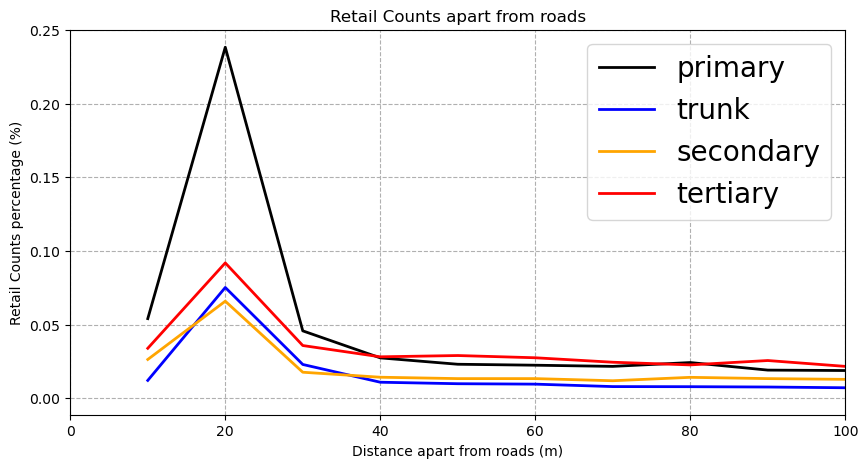

In [22]:
fig, ax = plt.subplots(figsize=(10,5))
cols = ['primary','trunk','secondary','tertiary']
en = 100
xx=rang[1:]
colors = ['k','b','orange','r']
for i,c in enumerate(cols):
    y = c_roads[c]/len(scattergdf)
    ax.plot(xx, y,'-',color=colors[i],linewidth=2,label=cols[i])

ax.grid(linestyle='--')
ax.set_xlim(0,100)
ax.set_title("Retail Counts apart from roads")
plt.xlabel("Distance apart from roads (m)")
plt.ylabel("Retail Counts percentage (%)")
plt.legend(loc='upper right',fontsize=20)

path_out = '../result/plot/'
filename = f'{year}_Retail_Counts_apart_from_roads'
plt.savefig(path_out+filename+'.png',
            dpi=500,bbox_inches = 'tight')